# Competición Clase (11 - marzo - 2024)

In [139]:
# Librerías:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
import numpy as np


In [140]:
# Lectura de los datos:
df_X = pd.DataFrame(pd.read_csv('C:/Users/Diego/OneDrive - Universidad Rey Juan Carlos/Documentos/GIA_URJC/Curso 2023-24/G.-IA/G.-IA/Curso_2/Cuatri_2/AprendizajeAutomatico_1/Competicion_clase/dataset_cc01/Xtrain.csv', sep = ';'))
df_Y = pd.DataFrame(pd.read_csv('C:/Users/Diego/OneDrive - Universidad Rey Juan Carlos/Documentos/GIA_URJC/Curso 2023-24/G.-IA/G.-IA/Curso_2/Cuatri_2/AprendizajeAutomatico_1/Competicion_clase/dataset_cc01/Ytrain.csv', sep = ';'))

# Visualización de los datos:
print(df_X.info(), '\n')
print(df_Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      640 non-null    int64  
 1   x1      640 non-null    float64
 2   x2      640 non-null    float64
 3   x3      640 non-null    float64
 4   x4      640 non-null    int64  
 5   x5      640 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 30.1 KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      640 non-null    int64 
 1   y       640 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None


In [141]:
# # Concatenar los datos:
# df_merge = pd.merge(Xtrain_data, Ytrain_data, on='id')

# # Información del bd:
# print(df_merge.info(), '\n\n', df_merge.head())

In [142]:
# Cambio de nombre de los atributos: 
nuevos_nombres_X = {
    'x1': 'glu-t',
    'x2': 'Hid_to_glu-t',
    'x3': 'Lip_to_Hid-t',
    'x4': 'Fumador',
    'x5': 'Edad'
}
nuevos_nombres_Y = {'y': 'Prob_hipoglu'}

df_X = df_X.rename(columns=nuevos_nombres_X)
df_Y = df_Y.rename(columns=nuevos_nombres_Y)
print(df_X.head(), '\n\n', df_Y.head())

    id     glu-t  Hid_to_glu-t  Lip_to_Hid-t  Fumador  Edad
0  546  2.181951      3.207904      4.959710        1    65
1  505  2.853759      3.136450      4.411881        0    27
2   94  3.079104      3.292550      3.409580        0    42
3  573  2.659334      4.084357      3.689412        0    53
4  104  2.880515      3.254065      3.340403        0    36 

     id Prob_hipoglu
0  546            r
1  505            r
2   94            b
3  573            r
4  104            b


In [143]:
# Codificación atributo 'Prob_Hipoglu': (r: 0 y b: 1)
df_Y['Prob_hipoglu'] = pd.DataFrame(pd.factorize(df_Y['Prob_hipoglu'])[0])
df_Y.head()


,id,Prob_hipoglu
0,546,0
1,505,0
2,94,1
3,573,0
4,104,1


In [144]:
print(df_X.corr())

df_complete = pd.merge(df_X, df_Y, on='id')
corr_mat = df_complete.corr()

print("\nCorrelación de 'target' con: ")
print(corr_mat["Prob_hipoglu"])


                    id     glu-t  Hid_to_glu-t  Lip_to_Hid-t   Fumador  \
id            1.000000 -0.729922      0.595264      0.584620  0.014033   
glu-t        -0.729922  1.000000     -0.662153     -0.429641 -0.001455   
Hid_to_glu-t  0.595264 -0.662153      1.000000     -0.107532 -0.030359   
Lip_to_Hid-t  0.584620 -0.429641     -0.107532      1.000000  0.036183   
Fumador       0.014033 -0.001455     -0.030359      0.036183  1.000000   
Edad         -0.036079 -0.044963      0.007392     -0.010597 -0.051919   

                  Edad  
id           -0.036079  
glu-t        -0.044963  
Hid_to_glu-t  0.007392  
Lip_to_Hid-t -0.010597  
Fumador      -0.051919  
Edad          1.000000  

Correlación de 'target' con: 
id             -0.025785
glu-t           0.190395
Hid_to_glu-t   -0.033298
Lip_to_Hid-t   -0.077880
Fumador        -0.007279
Edad           -0.034256
Prob_hipoglu    1.000000
Name: Prob_hipoglu, dtype: float64


In [145]:
print(df_X.corr())

df_complete = pd.merge(df_X, df_Y, on='id')
corr_mat = df_complete.corr()

print("\nCorrelación de 'target' con: ")
print(corr_mat["Prob_hipoglu"])


                    id     glu-t  Hid_to_glu-t  Lip_to_Hid-t   Fumador  \
id            1.000000 -0.729922      0.595264      0.584620  0.014033   
glu-t        -0.729922  1.000000     -0.662153     -0.429641 -0.001455   
Hid_to_glu-t  0.595264 -0.662153      1.000000     -0.107532 -0.030359   
Lip_to_Hid-t  0.584620 -0.429641     -0.107532      1.000000  0.036183   
Fumador       0.014033 -0.001455     -0.030359      0.036183  1.000000   
Edad         -0.036079 -0.044963      0.007392     -0.010597 -0.051919   

                  Edad  
id           -0.036079  
glu-t        -0.044963  
Hid_to_glu-t  0.007392  
Lip_to_Hid-t -0.010597  
Fumador      -0.051919  
Edad          1.000000  

Correlación de 'target' con: 
id             -0.025785
glu-t           0.190395
Hid_to_glu-t   -0.033298
Lip_to_Hid-t   -0.077880
Fumador        -0.007279
Edad           -0.034256
Prob_hipoglu    1.000000
Name: Prob_hipoglu, dtype: float64


In [146]:
# Realizamos PCA:
df_X_std = df_X.copy()
df_Y_std = df_Y.copy()

# Estandarizamos la base de datos en X:
scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(df_X_std)
df_X_std = scaler.transform(df_X_std)

# PCA en X:
pca = PCA(n_components=0.9).set_output(transform='pandas')
pca.fit(df_X_std)
df_pca = pca.transform(df_X_std)

print('Tabla con el 95% de componentes principales:')
df_pca.head()

Tabla con el 95% de componentes principales:


,pca0,pca1,pca2,pca3
0,-1.123099,-1.775416,1.068021,2.187593
1,0.189047,-1.206520,0.246597,-1.185793
2,1.923185,0.256539,0.406348,-0.322544
3,-0.457201,0.639919,0.793099,0.129305
4,1.696704,0.222597,0.100555,-0.553617


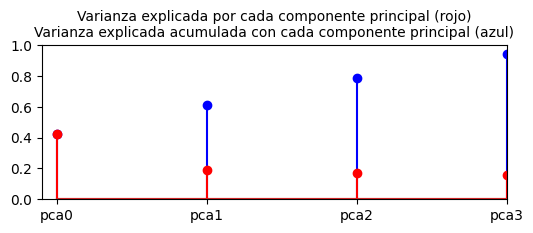

In [147]:
import matplotlib.pyplot as plt

def plot_PCA(pca):
  plt.stem(pca.explained_variance_ratio_.cumsum(),'b')
  plt.stem(pca.explained_variance_ratio_,'r')

  titleStr = 'Varianza explicada por cada componente principal (rojo)'
  titleStr = titleStr+'\n'
  titleStr = titleStr+'Varianza explicada acumulada con cada componente principal (azul)'
  plt.title(titleStr, fontsize=10)
  ax = plt.gca()
  ax.axis([-0.1,1.1,0,1])
  ax.set_xticks([i for i in range(pca.n_components_)])
  ax.set_xticklabels(["pca"+str(i) for i in range(pca.n_components_)])

  fig = plt.gcf()
  fig.set_size_inches(6,2)

  plt.show()

plot_PCA(pca)

In [148]:
#-- Aprendizaje del modelo lineal:
from sklearn import linear_model

X = df_pca[['pca0','pca1', 'pca2', 'pca3']]
Y = df_Y['Prob_hipoglu']

reg = linear_model.LinearRegression()
reg.fit(X,Y)
y_hat1 = reg.predict(X)

reg.fit(X,Y)
print(f'Los parámetros aprendidos para un modelo lineal son:')
print(f' w = {reg.coef_} , w0 = {reg.intercept_:0.2f}')

Los parámetros aprendidos para un modelo lineal son:
 w = [ 0.03302448  0.00609035 -0.01875086 -0.01545873] , w0 = 0.50


In [149]:
#-- Obtenemos los logits
logit = reg.predict(X)

#-- Convertimos los logits en probabilidad de pertenecer a la clase "1"
def logistic_fun(x):
    return 1 / (1 + np.exp(-x))

df_complete["logit"]=logit
df_complete['p(y=1)']=logistic_fun(logit)
df_complete.head()

,id,glu-t,Hid_to_glu-t,Lip_to_Hid-t,Fumador,Edad,Prob_hipoglu,logit,p(y=1)
0,546,2.181951,3.207904,4.959710,1,65,0,0.398254,0.598268
1,505,2.853759,3.136450,4.411881,0,27,0,0.512602,0.625416
2,94,3.079104,3.292550,3.409580,0,42,1,0.562441,0.637017
3,573,2.659334,4.084357,3.689412,0,53,0,0.471928,0.615840
4,104,2.880515,3.254065,3.340403,0,36,1,0.564061,0.637392


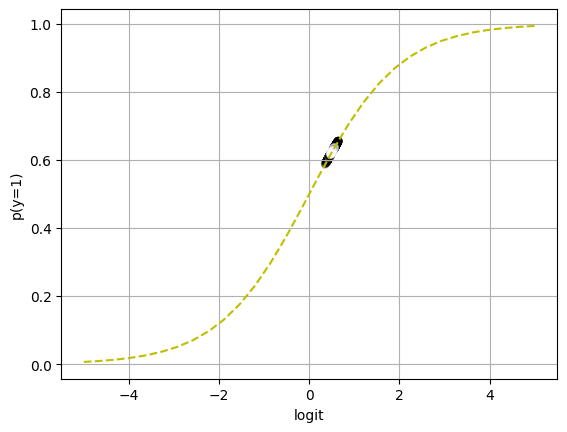

In [150]:
colors=df_complete['Prob_hipoglu'].copy()
colors[colors==1]=1
colors[colors==-1]=0
df_complete.plot.scatter(x='logit', y='p(y=1)', c=colors, s=30, alpha=0.5)
range_logit = np.linspace(-5,5,30)
plt.plot(range_logit, logistic_fun(range_logit), 'y--')
plt.grid()
plt.show()

In [ ]:
test = pd.DataFrame